## 大作业

注：前面部分是大作业说明与示例代码运行，请直接跳到“任务实现”部分

### 大作业说明

#### 数据集介绍

##### ImageNet-1K 数据集介绍

ImageNet数据是CV领域非常出名的数据集，ISLVRC竞赛使用的数据集是轻量版的ImageNet数据集。在很多CV领域的论文，都会使用这个数据集对自己的模型进行测试。ImageNet是一个计算机视觉系统识别项目，是目前世界上图像识别最大的数据库。是美国斯坦福的计算机科学家，模拟人类的识别系统建立的。能够从图片中识别物体，超过1400万的图像URL被ImageNet手动注释，以指示图片中的对象;在至少一百万张图像中，还提供了边界框。ImageNet包含2万多个类别; 一个典型的类别，如“气球”或“草莓”，每个类包含数百张图像。在一些论文中，有的人会将这个数据叫成ImageNet 1K或者ISLVRC2012，两者是一样的。“1K”代表的是1000个类别。

##### ImageNet-1K-16shot数据集介绍

* 本次Project中，会用到ImageNet 1K 中的少量样本，即训练集包括1000个类别，每个类别只提供至多16个样本，总样本数目为16000，测试集还是和原来ImageNet 1K的测试集一样。

* ImageNet-1K-16shot包含两个文件夹，为train 和 val，文件夹的结构如下所示：

    ```
    ImageNet-1K-16shot/
    |–– train/ # contains 1,000 folders like , n01443537, etc.
    |-- val/ # contains the same folders as train
    |-- classnames.txt / # contains 1,000 lines like n01440764 tench, etc.
    |-- label2class.json / # contains the relationship between label and class name.
    ```
* 本次Project使用train文件夹里面的数据当作训练集，val文件夹里面的数据当作测试集，包含总计50,000张图像；如果有需要用到类别名字，可以使用classname.txt进行名字转换。

##### 数据集下载与导入

运行助教提供的`download_data.sh`下载

```
curl 'https://zjueducn-my.sharepoint.com/personal/lms_zju_edu_cn/_layouts/15/download.aspx?SourceUrl=%2Fpersonal%2Flms%5Fzju%5Fedu%5Fcn%2FDocuments%2Fdataset%2Ezip' \
  -H 'authority: zjueducn-my.sharepoint.com' \
  -H 'accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7' \
  -H 'accept-language: zh-CN,zh;q=0.9' \
  -H 'cookie: MicrosoftApplicationsTelemetryDeviceId=82d392f0-19b7-7905-5b30-ddcf030f25a4; MicrosoftApplicationsTelemetryFirstLaunchTime=1689689389160; WSS_FullScreenMode=false; rtFa=re6APVfrxUcjk1znSL9wSH0fp37N9y6frG1aS7NmcbUmRUI1RkMwRjQtMjE2MS00MEQ4LTg0OTItNTE1OTQyNDQ5NzkzIzEzMzM0MTU5ODI0Mzc2Mzk0OSMyOEI1QzdBMC0yMDQ2LTIwMDAtNjkxMC1BRTk2ODY5MUM2MUEjTE1TJTQwWkpVLkVEVS5DTnUhoSFrZ0FFrB3mMeUMCanV6Jw/EY13zRv82BK0DoDYOYcyt5mTiZalpm+j72L9r+YwOFKnNHGgjhv6qQXQGU8Sa44kdmxx67dwl5bLow6C9omDzA4YBGMSyRhj/UOiEp8LuNnNYShk2+JICYtRUmj5OHXrp+Bue0PT0j4ts9Pxesd/HFa9YazdMfVKL0AAM14OMNhkoMpHwizaNLCVOLSO1aOnFqjnuNV3/+W34bTnaTkntalLBTNxhh0807H9t+owu66Y6D8gV5uT3w9tKQk08nY7qlRwMOB5EK9hPTIEvX+/RCX7bCxWjf9Vl2B2bOlDyyp8AY8IfpV5SbAT4w+OAAAA; SIMI=eyJzdCI6MH0=; FedAuth=77u/PD94bWwgdmVyc2lvbj0iMS4wIiBlbmNvZGluZz0idXRmLTgiPz48U1A+VjEyLDBoLmZ8bWVtYmVyc2hpcHwxMDAzMjAwMmMwNDExMjQ0QGxpdmUuY29tLDAjLmZ8bWVtYmVyc2hpcHxsbXNAemp1LmVkdS5jbiwxMzMzMzcwOTE5MTAwMDAwMDAsMTMzMzM3MDkxOTAwMDAwMDAwLDEzMzM0NTkxODI0MzYwNzcwMCwyNDA0OmMxNDA6MjIxOjFlOjpiLDMsZWI1ZmMwZjQtMjE2MS00MGQ4LTg0OTItNTE1OTQyNDQ5NzkzLCwzODVmODM0Yi1iODE2LTQxZTUtOGE0NC04ZTRmNzUyOThmMWYsMjhiNWM3YTAtMjA0Ni0yMDAwLTY5MTAtYWU5Njg2OTFjNjFhLDI4YjVjN2EwLTIwNDYtMjAwMC02OTEwLWFlOTY4NjkxYzYxYSwsMCwxMzMzNDI0NjIyNDAzMjYzNzYsMTMzMzQ0MTkwMjQwMzI2Mzc2LCwsZXlKNGJYTmZZMk1pT2lKYlhDSkRVREZjSWwwaUxDSjRiWE5mYzNOdElqb2lNU0lzSW5CeVpXWmxjbkpsWkY5MWMyVnlibUZ0WlNJNklteHRjMEI2YW5VdVpXUjFMbU51SWl3aWRYUnBJam9pTTFjME4wbExVRWRCVlRZeVRGcFBXa0kzYjBWQlFTSjksMjY1MDQ2Nzc0Mzk5OTk5OTk5OSwxMzMzNDE1OTgyMjAwMDAwMDAsNmYwNWNlMmMtYjA4Ni00ODQ5LTk4ZWQtYzlhNWI0NmIyMWJhLCwsLCwsMCwsTDBucjhxSGZ4WFQrTk00L2JkQ0lSMFBoeXFjcTVBeVlaOVY1MWRYbWNDZkVYbThHYWNjT0ZDdDN0NFVLZjdsbGppVzZNVTRqRkQvTU9Jamg5ZFg4b3E1QXFKZmVoQUNYSDFxM3VtMUF1UHppb3lXMGpocVhMNm1iQnNwR0syVE84RTc2MDJ6cklDbWFOb1FCTnUwUkNSWkdnY2t0RHJoR21DWHZXeW9jcWZjMko0UjR1cW82QlNDalJpZmZ5TUR3Q3ZsMjdRS0ZNRGQzOVA0dVZFaW5Fc3VNZGtERE1rdUpWNzl5RjR6YnMzbDFTb0RZR2ljVHMvRjgzT0ZsV2NaWG9VKzRtOHZJYWJtczRwVU9vMkJmT3BvUFl3elg5TmxUc1ZqaVduYmVSUmp5MXRXTFdrY1Zka2NYV0wwNnU3RXpGSXlLY1VuTzdkNjFpV3BiMnhIMHN3PT08L1NQPg==; odbn=1' \
  -H 'referer: https://zjueducn-my.sharepoint.com/personal/lms_zju_edu_cn/_layouts/15/onedrive.aspx?id=%2Fpersonal%2Flms%5Fzju%5Fedu%5Fcn%2FDocuments%2Fdataset%2Ezip&parent=%2Fpersonal%2Flms%5Fzju%5Fedu%5Fcn%2FDocuments&ga=1' \
  -H 'sec-ch-ua: "Not.A/Brand";v="8", "Chromium";v="114", "Google Chrome";v="114"' \
  -H 'sec-ch-ua-mobile: ?0' \
  -H 'sec-ch-ua-platform: "Windows"' \
  -H 'sec-fetch-dest: iframe' \
  -H 'sec-fetch-mode: navigate' \
  -H 'sec-fetch-site: same-origin' \
  -H 'sec-fetch-user: ?1' \
  -H 'service-worker-navigation-preload: true' \
  -H 'upgrade-insecure-requests: 1' \
  -H 'user-agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/114.0.0.0 Safari/537.36' \
  --compressed --output dataset.zip
```

数据集导入如下：

In [20]:
import os
import json
import matplotlib.pyplot as plt
root_path= '.' # Your root folder
data_path = os.path.join(root_path, 'ImageNet-1K-16shot')
print(os.listdir(data_path))

['classnames.txt', 'label2class.json', 'train', 'val']


In [21]:
# 查看训练集的数据和图像
train_path = os.path.join(data_path, 'train')
test_path = os.path.join(data_path, 'val') 
train_folders = os.listdir(train_path)
#print('Train folders: ', train_folders)
#Train folders:  ['n01440764', 'n01443537', 'n01484850', 'n01491361', 'n01494475', 'n01496331', 'n01498041', 'n01514668', 'n01514859', 'n01518878', 'n01530575', 'n01531178', 'n01532829', ... , 'n13054560', 'n13133613', 'n15075141']

# 文件夹名字有对应的类别名字，可以从classnames.txt 中读取，存成字典的格式
with open(os.path.join(data_path, 'classnames.txt'), 'r') as f:
    data = f.readlines()
    data = [d.strip().replace('/', 'and').split(" ") for d in data]
    #print(data)
    #[['n01440764', 'tench'], ['n01443537', 'goldfish'], ['n01484850', 'great', 'white', 'shark'], ... , ['n13133613', 'corn', 'cob'], ['n15075141', 'toilet', 'paper']]

    folders_to_names = {d[0]:' '.join(d[1:]) for d in data}
    #print(folders_to_names)
    #{'n01440764': 'tench', 'n01443537': 'goldfish', 'n01484850': 'great white shark', ... ,'n13054560': 'bolete', 'n13133613': 'corn cob', 'n15075141': 'toilet paper'}

# label2class json 文件读取
with open(os.path.join(data_path, 'label2class.json'), 'r') as f:
    json_data = json.load(f)
    #print(json_data)
    #{'label2class': {'0': 'tench', '1': 'goldfish', '2': 'great white shark', ... , '997': 'bolete', '998': 'corn cob', '999': 'toilet paper'}}

#### CLIP模型介绍

##### CLIP

* CLIP（对比语言-图像预训练）是一种在各种（图像、文本）对上训练的神经网络。通过大规模图像-文本对的预训练，CLIP有着很强大的下游任务泛化能力，可以在下游任务不提供任何样本进行训练的情况下实现零样本推理。
* 本次 Project 提供 CLIP 进行零样本推理的代码教程，以及在ImageNet-1K-16shot数据集上的零样本性能。
* CLIP参考网址 (https://github.com/openai/CLIP/tree/main)

In [3]:
import numpy as np
import torch
from pkg_resources import packaging
print("Torch version:", torch.version )

Torch version: <module 'torch.version' from '/home/ma-user/anaconda3/envs/PyTorch-1.8/lib/python3.7/site-packages/torch/version.py'>


##### CLIP 模型导入

**Configuration**

在ModelArts平台的终端安装必备的依赖以及将CLIP的github仓库作为Python package安装

```
pip install ftfy regex tqdm
pip install git+https://github.com/openai/CLIP.git
pip install scikit-image
```

**Loading the model**

In [4]:
import clip
clip.available_models()
#clip.available_models()列出可用 CLIP 模型的名称，RN50指的ResNet。

#clip.load()函数返回两个值：
#模型本身和一个预处理函数，预处理函数可以将图片或者文本数据转化为模型需要的输入格式。
model, preprocess = clip.load("RN50")

#这一行将模型移动到GPU上，并设置模型为评估模式。
# .cuda()函数是将模型从CPU移动到GPU，以便加速计算。
# .eval()函数是将模型设置为评估模式，这是因为在训练和评估模型时，一些神经网络层（例如Dropout和BatchNorm）的行为是不同的。
model.cuda().eval()

#这一行获取模型的图像输入分辨率。这是模型期望的图像输入的大小。
input_resolution = model.visual.input_resolution

#一行获取模型的文本输入的长度。这是模型期望的文本输入的最大长度。
context_length = model.context_length

#这一行获取模型的词汇表大小。这是模型可以处理的不同单词的数量。
vocab_size = model.vocab_size

#这一行打印出模型的参数数量。这通过计算模型所有参数的形状的乘积并加总得出。
print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}") 
print("Input resolution:", input_resolution)
print("Context length:", context_length)
print("Vocab size:", vocab_size)

100%|███████████████████████████████████████| 244M/244M [00:05<00:00, 45.0MiB/s]


Model parameters: 102,007,137
Input resolution: 224
Context length: 77
Vocab size: 49408


**Image Preprocessing**

我们调整输入图像的大小并对它们进行中心裁剪，以符合模型期望的图像分辨率。 在此之前，我们将使用数据集平均值和标准差对像素强度进行标准化。

clip.load()的第二个返回值 preprocess 包含执行此预处理的 torchvision Transform。这个函数接受一个PIL图像，然后返回一个适合模型输入的PyTorch张量。

In [5]:
preprocess

Compose(
    Resize(size=224, interpolation=bicubic)
    CenterCrop(size=(224, 224))
    <function _convert_image_to_rgb at 0x7f7b520e3680>
    ToTensor()
    Normalize(mean=(0.48145466, 0.4578275, 0.40821073), std=(0.26862954, 0.26130258, 0.27577711))
)

这段代码中，`Compose`是一个用于图像预处理的类，它接受一个函数列表作为参数，然后将这些函数按照顺序应用到输入的图像上。

这里的`Compose`函数包括以下步骤：

1. `Resize(size=224, interpolation=bicubic)`: 这个函数这个函数的目的是将图像的最小边缩放到给定的大小（这里是224）且保持长宽比。这里使用的插值方法是双三次插值（bicubic）。

2. `CenterCrop(size=(224, 224))`: 这个函数会从图像中心裁剪出一个指定大小（这里是224x224）的区域。

3. `<function _convert_image_to_rgb at 0x7fb6bb069a70>`: 这个函数将图像转换为RGB格式。

4. `ToTensor()`: 这个函数将PIL图像或者NumPy数组转换为PyTorch张量。

5. `Normalize(mean=(0.48145466, 0.4578275, 0.40821073), std=(0.26862954, 0.26130258, 0.27577711))`: 这个函数对图像进行归一化处理，使得每个通道的均值和标准差分别为给定的值。

这些步骤都是深度学习中常见的图像预处理方法，用于将原始图像转换为模型需要的格式。

**Text Preprocessing**

我们使用不区分大小写的分词器，可以使用clip.tokenize()调用它。 默认情况下，输出被填充为 77 个令牌长，这是 CLIP 模型所期望的文本输入。

In [6]:
clip.tokenize("Hello World!")

tensor([[49406,  3306,  1002,   256, 49407,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0,     0,     0,     0,     0,     0]], dtype=torch.int32)

**Setting up input images and texts**

在这个例子中，我们将向模型提供 8 个示例图像及其文本描述，并比较相应特征之间的相似度。分词器不区分大小写，我们可以自由地给出任何合适的文本描述。

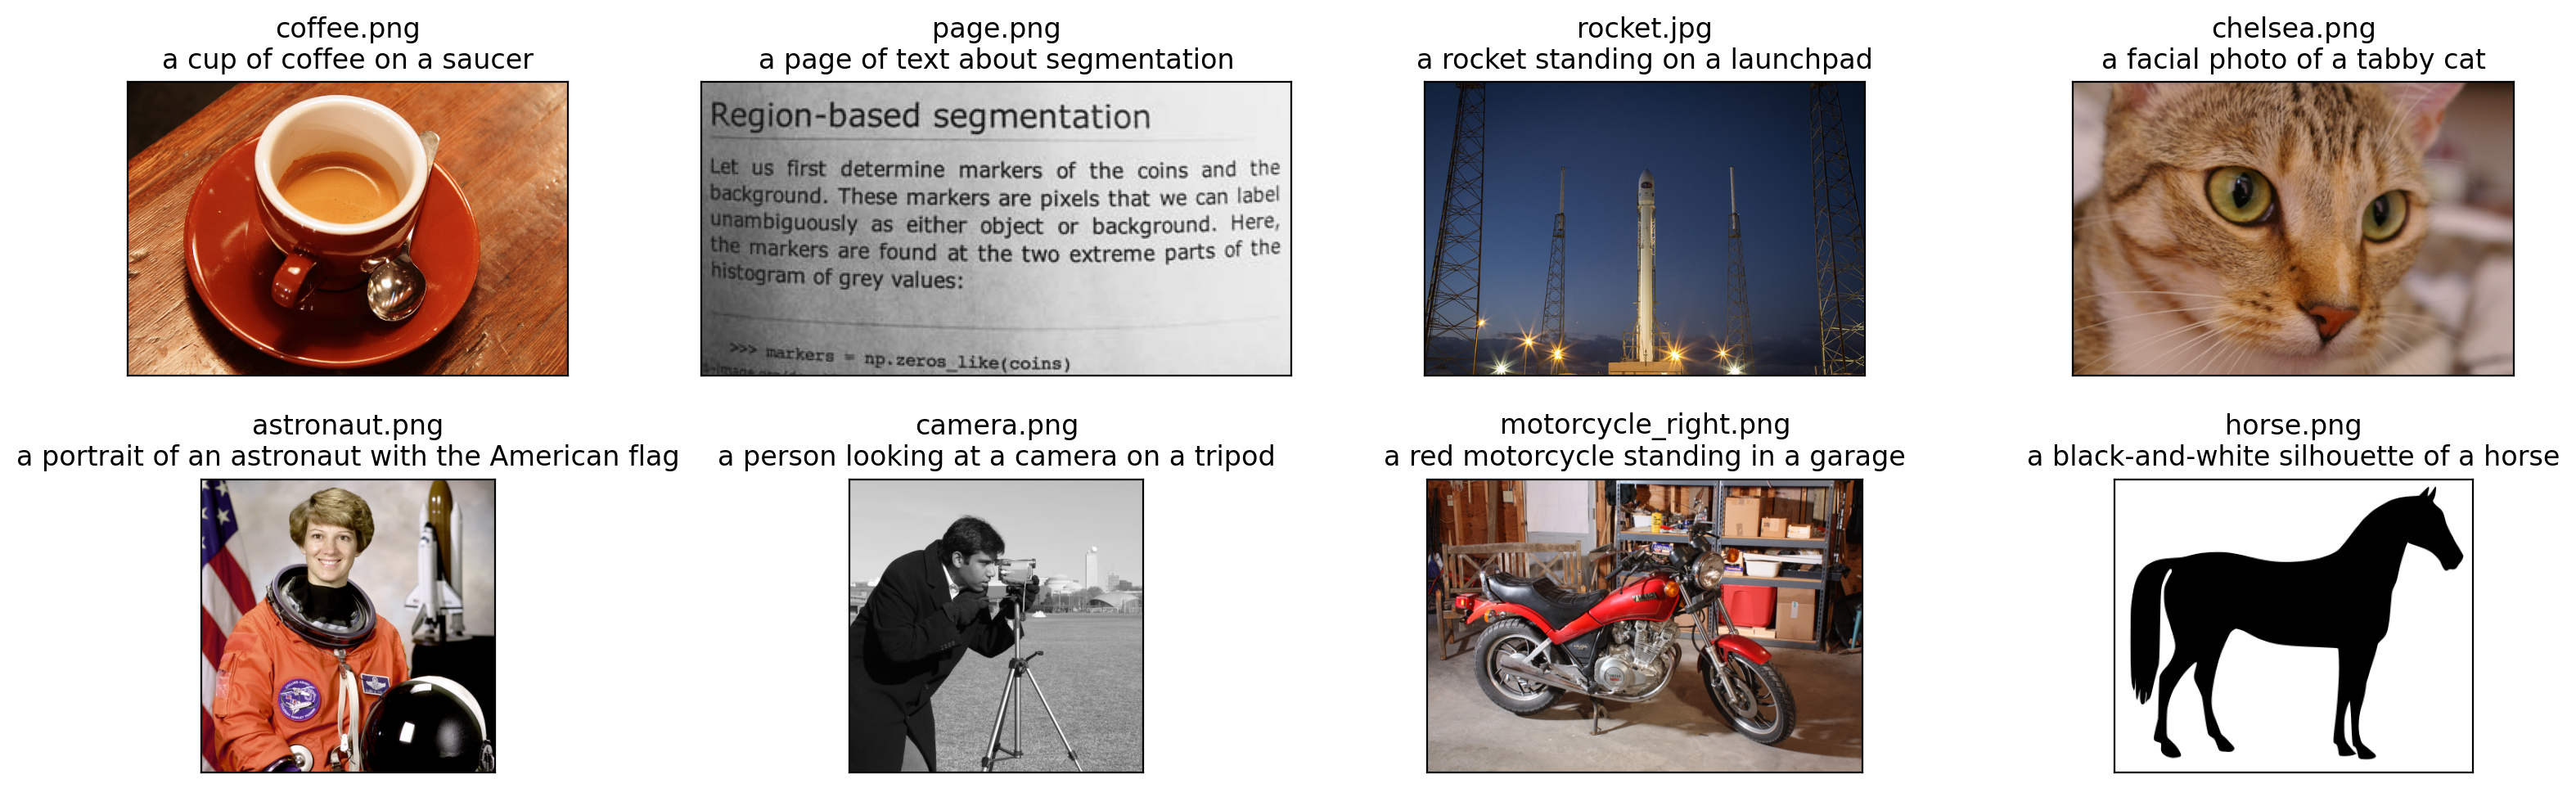

In [7]:
import os
import skimage #在ModelArts平台上需要pip install scikit-image
import IPython.display
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

from collections import OrderedDict
import torch
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
# images in skimage to use and their textual descriptions
descriptions = {
    "page": "a page of text about segmentation",
    "chelsea": "a facial photo of a tabby cat",
    "astronaut": "a portrait of an astronaut with the American flag", 
    "rocket": "a rocket standing on a launchpad",
    "motorcycle_right": "a red motorcycle standing in a garage", 
    "camera": "a person looking at a camera on a tripod",
    "horse": "a black-and-white silhouette of a horse",
    "coffee": "a cup of coffee on a saucer"
}

original_images = [] #存储原始图像
images = [] #存储预处理后的图像
texts = [] #存储图像描述的List
plt.figure(figsize=(16, 5))

for filename in [filename for filename in os.listdir(skimage.data_dir) if filename.endswith(".png") or filename.endswith(".jpg")]:
    # skimage.data_dir是scikit-image库中的一个变量，它表示该库自带的示例图像数据的存储路径
    # os.listdir(skimage.data_dir)列出该目录下的所有文件
    # 遍历skimage数据目录中的所有.png和.jpg文件
    name = os.path.splitext(filename)[0]
    if name not in descriptions:# 跳过了那些在descriptions字典中没有描述的图像。
        continue

    # 图像可以有多种格式，包括RGB、RGBA、L（灰度）、P（调色板）等等。
    # 这一行加载图像并将其转换为RGB格式。
    image = Image.open(os.path.join(skimage.data_dir, filename)).convert("RGB")
    
    plt.subplot(2, 4, len(images) + 1)
    plt.imshow(image)
    plt.title(f"{filename}\n{descriptions[name]}") 
    plt.xticks([]) #移除x轴的所有刻度。
    plt.yticks([]) #移除y轴的所有刻度。
    original_images.append(image)
    images.append(preprocess(image))#调用预处理函数对image处理
    texts.append(descriptions[name])

plt.tight_layout()#调整子图之间的间距，使得图像显示得更美观

In [8]:
print(images[0].shape)
print(len(images))

torch.Size([3, 224, 224])
8


**Building features**

首先，我们对图像进行标准化处理和对每个文本输入进行标记，然后运行模型的forward过程来获取图像和文本特征。

In [9]:
image_input = torch.tensor(np.stack(images)).cuda()
print("image_input.shape=")
print(image_input.shape)
#这里首先将预处理后的图像列表images堆叠成一个Numpy数组，然后将其转换成PyTorch张量，并将张量放到GPU上。

text_tokens = clip.tokenize(["This is " + desc for desc in texts]).cuda()
#这行代码首先构建一个文本列表，然后使用clip.tokenize()函数将这些文本转换成CLIP模型所需的token格式，并将结果放到GPU上。
print("text_tokens.shape=")
print(text_tokens.shape)

with torch.no_grad():
    #这个语句是告诉PyTorch在接下来的计算中不要计算梯度，因为我们在提取特征的过程中并不需要梯度。这可以降低内存使用量，提高计算速度。

    image_features = model.encode_image(image_input).float()
    # 这行代码将图像输入到CLIP模型中，提取图像特征。

    text_features = model.encode_text(text_tokens).float()
    # 这行代码将token化的文本输入到CLIP模型中，提取文本特征。

print("image_featuresimage_features.shape=")
print(image_features.shape)

print("text_features.shape=")
print(text_features.shape)

image_input.shape=
torch.Size([8, 3, 224, 224])
text_tokens.shape=
torch.Size([8, 77])
image_featuresimage_features.shape=
torch.Size([8, 1024])
text_features.shape=
torch.Size([8, 1024])


经过这些步骤，我们就得到了图像和文本的特征向量，可以用来计算它们的相似性。

**Calculating cosine similarity**

计算图像和文本特征之间的相似度

余弦相似度（Cosine Similarity）是一种在多维空间中计算两个向量之间相似度的度量方式。相比欧式距离等其他相似度计算方式，余弦相似度主要反映两个向量方向的差异而非大小，因此它特别适合用于文本、图像等高维数据的相似性比较。

余弦相似度计算公式如下：

```
cosine_similarity(A, B) = dot_product(A, B) / (norm(A) * norm(B))
```

其中，`dot_product(A, B)`表示向量A和B的点积，`norm(A)`和`norm(B)`分别是向量A和B的欧几里得范数（或叫L2范数，即向量元素平方和的平方根）。这个公式的结果值范围在-1到1之间，1表示两个向量方向完全相同，-1表示完全相反，0表示两个向量是正交的。

在实际计算时，通常会将向量先进行归一化（即使得范数为1），这样只需要计算归一化后的向量的点积就可以得到余弦相似度。

Text(0.5, 1.0, 'Cosine similarity between text and image features')

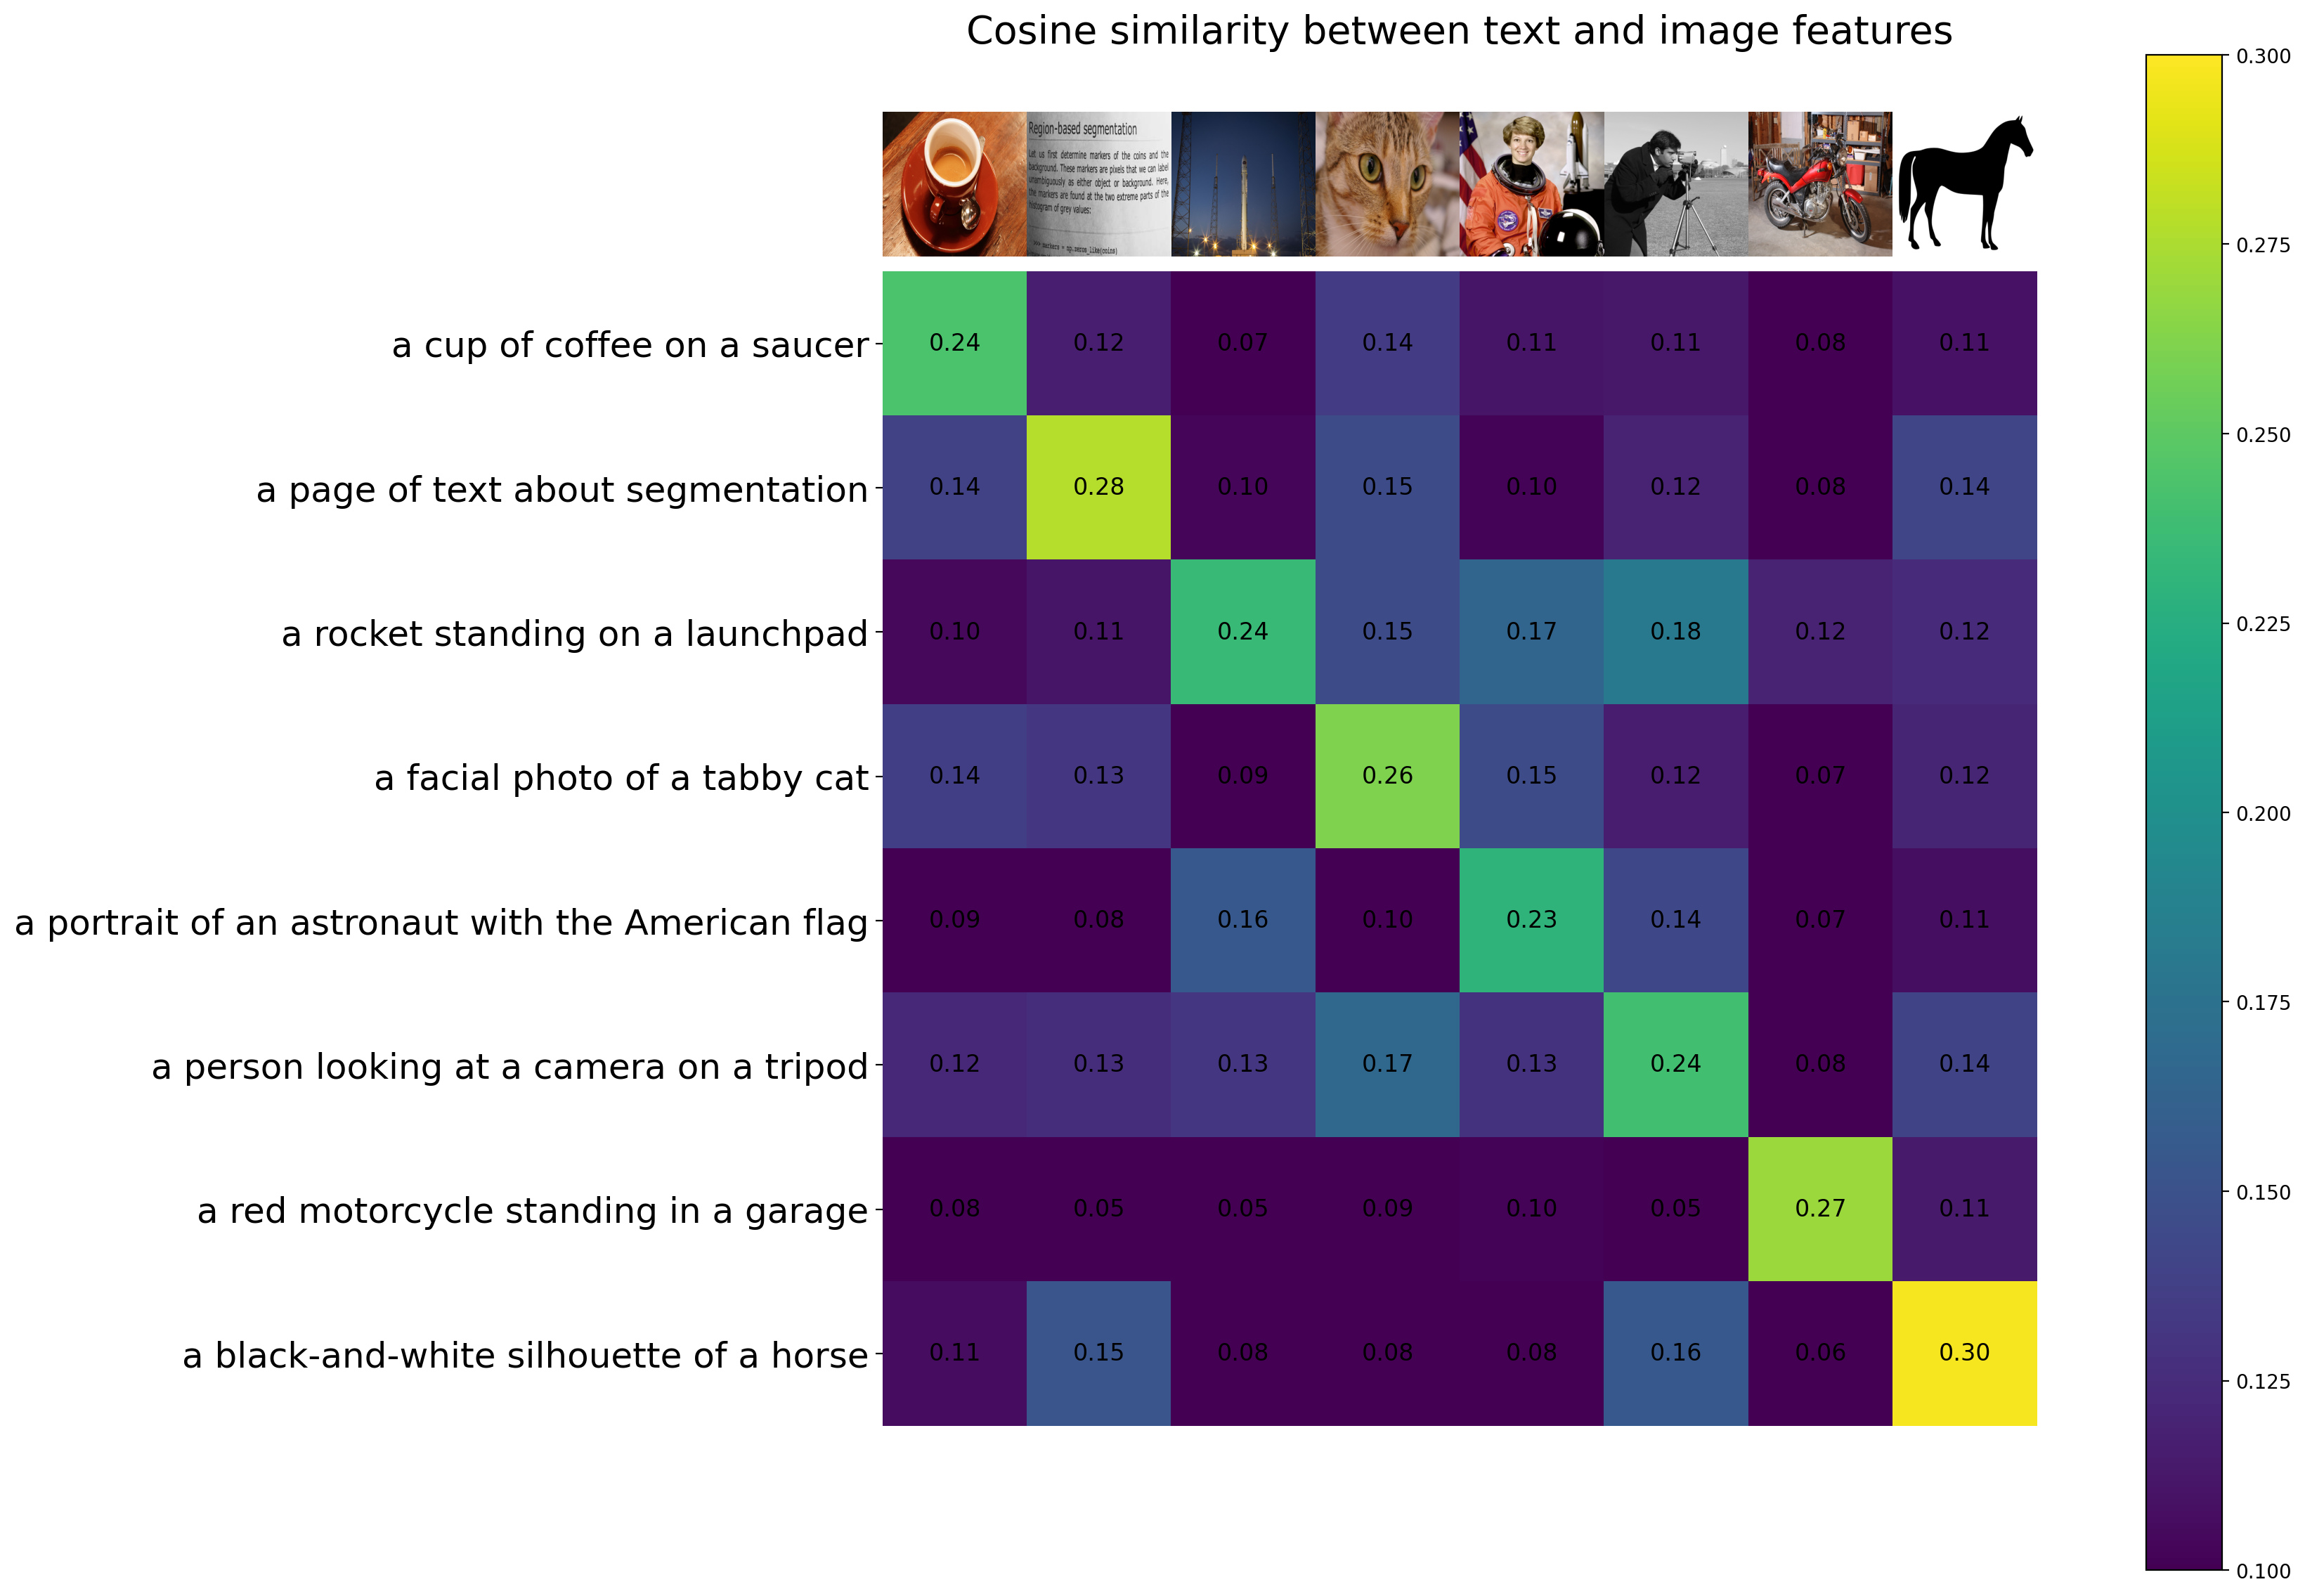

In [11]:
image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
#这两行代码的目的是对图像和文本的特征进行L2范数归一化。也就是说，它们将每个特征向量的长度缩放为1。这是计算余弦相似度的必要步骤。

similarity = text_features.cpu().numpy() @ image_features.cpu().numpy().T
#这行代码计算了归一化后的文本特征和图像特征之间的余弦相似度。由于文本特征和图像特征都已经归一化，因此我们可以直接计算它们的点积得到余弦相似度。

count = len(descriptions)


#下面的代码是用来创建一个可视化的图表，展示文本和图像特征之间的余弦相似度。在图表中，每一行对应一个文本描述，每一列对应一张图像，单元格中的数值是对应文本和图像的余弦相似度

plt.figure(figsize=(20, 14))
plt.imshow(similarity, vmin=0.1, vmax=0.3) 
#根据二维数组和指定的色彩映射规则（colormap）生成图像
# vmin和vmax是可选参数，它们分别定义了色彩映射规则中的最小值和最大值。所有小于vmin的数据都会被映射到colormap的最低颜色，所有大于vmax的数据都会被映射到colormap的最高颜色。在这里，所有小于0.1的相似度都会被映射到最低颜色，所有大于0.3的相似度都会被映射到最高颜色。
plt.colorbar()
#在图像旁边显示一个色条（colorbar），用于表示数据值和颜色之间的关系。
plt.yticks(range(count), texts, fontsize=18)
plt.xticks([])

for i, image in enumerate(original_images):
#enumerate函数会返回一个迭代器，它生成一对一对的元素，每一对由两个元素组成：第一个是当前元素的索引（在这里用i接收），第二个是序列中的元素（在这里用image接收）
    plt.imshow(image, extent=(i - 0.5, i + 0.5, -1.6, -0.6), origin="lower")
    # 这段代码将每一张原始图像放置在图表的底部对应的列下。
    # origin：这个参数决定了图像的原点是在左上角还是左下角。默认情况下，图像的原点在左上角，这个参数的默认值是"upper"。但是在这段代码中，origin被设定为"lower"，表示图像的原点在左下角。这意味着y坐标的值越大，图像越向上。
    # 在这段代码中，extent参数是用来调整每个原始图像的位置的。通过改变x坐标的值（即i-0.5和i+0.5），可以改变每个原始图像在x轴上的位置，使它们在图像上均匀分布。而y坐标的值被设定为-1.6和-0.6，这使得所有原始图像都在相同的y轴位置。

for x in range(similarity.shape[1]):
    for y in range(similarity.shape[0]):
        plt.text(x, y, f"{similarity[y, x]:.2f}", ha="center", va="center", size=12)

for side in ["left", "top", "right", "bottom"]:
    plt.gca().spines[side].set_visible(False)

plt.xlim([-0.5, count - 0.5])
plt.ylim([count + 0.5, -2])

plt.title("Cosine similarity between text and image features", size=20)

##### CLIP在ImageNet-1K-16shot的零样本推理

在这一个部分中，我们会介绍如何利用CLIP进行某个数据集的零样本推理，以Project提供的ImageNet-1K-16shot数据集为例子。

注： 零样本示例代码的耗时较长，因为此处的test_loader使用了默认参数值：num_workers=4。
num_workers 参数它决定了在数据加载过程中使用多少个子进程。这个参数的值可以大大影响数据预处理的速度以及整体的训练速度。

在后面的Tip-Adapter和Tip-Adapter-F代码中，num_workers值设为8，可以显著提高速度。

**准备数据集**

In [13]:
import torch
import torchvision
import torchvision.datasets as datasets

import clip

from tqdm import tqdm
#tqdm是一个快速，可扩展的Python进度条库，可以在Python长循环中添加一个进度提示信息。

model, preprocess = clip.load("RN50")

test_dataset = datasets.ImageFolder(test_path, transform=preprocess)
#test_path是在“数据集下载与导入”一节里面定义的
#datasets.ImageFolder是一个通用的数据加载器，可以从一个文件夹中加载图像数据
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False) 
#创建一个数据加载器。数据加载器可以自动地将数据分成多个批次，然后逐批次地输入到模型中。参数batch_size=64表示每个批次包含64个数据，参数shuffle=False表示在加载数据时不对数据进行随机排序。

num_classes = len(test_dataset.classes)#test_dataset.classes是一个列表，包含了数据集中所有的类别名称（文件夹名称）
print("class counts:", num_classes)


class counts: 1000


In [14]:
with open(os.path.join(data_path, 'label2class.json'), 'r') as f:
    json_data = json.load(f) 
    # 注意json.load的结果是一个json包，里面是{文件名}:{文件内容}
    #print(json_data)
    #{'label2class': {'0': 'tench', '1': 'goldfish', '2': 'great white shark', '3': 'tiger shark', '4': 'hammerhead shark', '5': 'electric ray', ... , '997': 'bolete', '998': 'corn cob', '999': 'toilet paper'}}

label2class = json_data['label2class']
# 从读取的数据中获取"label2class"键对应的值，并将其赋值给label2class。
# "label2class"对应的值是一个字典，其中的键是标签（通常是整数），值是对应的类别名称（通常是字符串）。
#print(label2class)
#{'0': 'tench', '1': 'goldfish', '2': 'great white shark', '3': 'tiger shark', '4': 'hammerhead shark', '5': 'electric ray', ... , '996': 'hen of the woods mushroom', '997': 'bolete', '998': 'corn cob', '999': 'toilet paper'}

classnames = [v for k, v in label2class.items()]
#用列表推导式获取所有的类别名称。label2class.items()会返回一个元组的列表，每个元组包含一个键和一个值
#print(classnames)
#['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead shark', 'electric ray', ... , 'hen of the woods mushroom', 'bolete', 'corn cob', 'toilet paper']



**利用CLIP模型生成分类器**

In [15]:
def clip_classifier(classnames, clip_model, template):
    #接受三个参数：类别名称列表，CLIP模型，和模板字符串
    clip_model.eval()#切换模型到评估模式
    with torch.no_grad():#只需前向传播 
        clip_weights = []#初始化一个空列表，用于存储每个类别的文本嵌入
        for classname in classnames:
            # Tokenize the prompts
            texts = template.format(classname) #使用模板字符串和类别名称生成描述性文本。
            texts = clip.tokenize(texts).cuda() #将描述性文本转换为CLIP模型可以处理的tokenized format，并将其发送到GPU。
            #prompt ensemble for ImageNet
            class_embedding = clip_model.encode_text(texts) #使用CLIP模型的文本编码器生成文本的嵌入。
            class_embedding /= class_embedding.norm(dim=-1, keepdim=True) #对嵌入进行标准化。
            clip_weights.append(class_embedding)#将类别的文本嵌入添加到clip_weights列表中。
        clip_weights = torch.cat(clip_weights, dim=0).cuda()#将所有类别的文本嵌入连接到一个tensor中，并将其发送到GPU。

        
        # 上面一行代码原本为torch.concat，但报错module 'torch' has no attribute 'concat'
        # PyTorch文档说torch.concat 是 torch.cat的别名，直接换成torch.cat解决了报错
    return clip_weights 

template = 'a photo of a {}.'
text_classifier = clip_classifier(classnames, model, template)
print("text_classifier.shape=",text_classifier.shape)


text_classifier.shape= torch.Size([1000, 1024])


**执行分类并统计准确率**

In [16]:
top1_accuracy = 0.0
top5_accuracy = 0.0
total_samples = 0
model.cuda().eval()
test_count=0
with torch.no_grad():
    for images, labels in tqdm(test_loader): 
        if(test_count==0):
            print("images.shape=",images.shape)
            print("labels.shape=",labels.shape)
        images = images.cuda()
        image_features = model.encode_image(images)#使用模型对图像进行编码，得到图像的特征。
        image_features = image_features / image_features.norm(dim=-1, keepdim=True)#对图像特征进行标准化。
        if(test_count==0):
            print("image_features.shape=",image_features.shape)
        logits = image_features @ text_classifier.t()#通过矩阵乘法计算图像特征与文本分类器权重的点积，得到预测的logits。
        if(test_count==0):
            print("logits.shape=",logits.shape)
        probs = logits.softmax(dim=-1)#对logits应用softmax函数，得到每个类别的预测概率。
        if(test_count==0):
            print("probs.shape=",probs.shape)
            #print("probs=",probs)
        
        _, predicted_labels = probs.topk(5, dim=-1)
        #从预测的概率中选择概率最高的前五个类别作为预测的标签。
        #这里第一个返回值是最大的五个概率值，第二个返回值是他们对应的索引值（下标），亦即label
        
        
        predicted_labels = predicted_labels.cpu()#将预测的标签转移到CPU。
        if(test_count==0):
            print("predicted_labels.shape=",predicted_labels.shape)
            #print("predicted_labels=",predicted_labels)
        total_samples += labels.size(0)#将当前批次的样本数量加到总样本数上。
        top1_accuracy += (predicted_labels[:, 0] == labels).sum().item()#计算top1准确率，并累加到总的top1准确率。
        #print("\npredicted_labels[:,0]=\n",predicted_labels[:, 0])
        #print("\n(predicted_labels[:, 0] == labels)=\n",(predicted_labels[:, 0] == labels))
        top5_accuracy += (predicted_labels == labels.view(-1, 1)).sum().item()
        #print("\nlabels.view(-1, 1)=\n",labels.view(-1, 1))
        if(test_count==0):
            print("\n(predicted_labels == labels.view(-1, 1)).shape=\n",(predicted_labels == labels.view(-1, 1)).shape)
            print("\n(predicted_labels == labels.view(-1, 1)).sum():\n",(predicted_labels == labels.view(-1, 1)).sum())
        test_count=1

top1_accuracy /= total_samples
top5_accuracy /= total_samples


  0%|          | 1/782 [00:00<07:57,  1.64it/s]

images.shape= torch.Size([64, 3, 224, 224])
labels.shape= torch.Size([64])
image_features.shape= torch.Size([64, 1024])
logits.shape= torch.Size([64, 1000])
probs.shape= torch.Size([64, 1000])
predicted_labels.shape= torch.Size([64, 5])

(predicted_labels == labels.view(-1, 1)).shape=
 torch.Size([64, 5])

(predicted_labels == labels.view(-1, 1)).sum():
 tensor(61)


100%|██████████| 782/782 [07:54<00:00,  1.65it/s]


**输出准确率**

In [17]:
print("Top-1 Accuracy: {:.2f}%".format(top1_accuracy * 100))
print("Top-5 Accuracy: {:.2f}%".format(top5_accuracy * 100))


Top-1 Accuracy: 58.11%
Top-5 Accuracy: 85.19%


### 任务目标与要求

#### 任务目标

少样本学习在机器学习领域具有重大意义和挑战性，是否拥有从少量样本中学习和概括的能力，是将人工智能和人类智能进行区分的明显分界点，因为人类可以仅通过一个或几个示例就可以轻松地建立对新事物的认知，而机器学习算法通常需要成千上万个有监督样本来保证其泛化能力。本次大作业在给定具有挑战性的ImageNet-1K-16shot数据集（即每个类只有包含少量训练样本）的基础上，旨在用少量的样本来提升模型性能，即增强模型在ImageNet-1K-16shot 测试集上的分类性能。

注明：可以通过以下渠道进行思考解决这个任务：
1. 通过上述的预训练大模型比如 CLIP 来提升性能；
2. 通过设计特殊的数据处理方式来提升性能；
3. 通过设计特殊的网络结构来提升性能。

可能用到的参考文献：
1. Learning Transferable Visual Models From Natural Language Supervision. (ICML 2021)
2. Learning to Prompt for Vision-Language Models. (IJCV 2022)
3. P>M>F pipeline for few-shot learning (CVPR2022)
4. Tip-Adapter: Training-free Adaption of CLIP for Few-shot Classification (ECCV 2022)

#### 任务要求

在ImageNet上实现小样本分类。

1. 设计可学习参数的模型，可以但不能仅使用懒惰学习模型，如KNN；
2. 测试模型分别在每个类只提供1个样本，5个样本，16个样本情况下的性能；
3. 性能要求：1-Shot （每个类提供一个样本）超越零样本分类结果。说明：可以和零样本分类结合。
4. 实验分析。验证模型的有效性，性能，可视化，定量和定性分析。

### 任务实现

#### 任务分析

本次任务的重点应为将预训练大模型CLIP适配到ImageNet-1k的小样本分类上。

对于大模型，在下游任务数据集上进行全量微调(Full Fine-Tuning)的时间成本和硬件成本都是不可接受的。如何高效地微调预训练大模型催生了一系列高效参数微调技术（**Parameter-Efficient Fine-Tuning**，简称为PEFT）。

PEFT的基本思想是，为预训练模型添加一些额外的模块，而后冻结预训练参数，只训练额外模块的少量参数。根据额外添加模块的不同，PEFT主要分为三类：
1. Adapter

    添加称为adapter的新网络模块。如果adapter串连地添加到多头注意力和前馈层之后，称为Series Adapter。如果并列，则称为Parallel Adapter。

2. Prefix Tuning

    在模型输入或者隐层前添加一段连续的、任务特定的前缀序列，称为 prefix。这段序列不对应真实的 tokens，是可学习的自由参数。

3. LoRA

    LoRA 的全称是 Low-Rank Adaptation，意思是用低秩矩阵来近似满秩权重矩阵的参数更新。
    预训练模型的权重矩阵$W_0 \in \R^{d\times k}$，将其更新矩阵用低秩分解表示：$\Delta W=BA, A\in \R^{r\times k}, B\in \R^{d \times r}, r\ll min(d,k)$。只训练低秩矩阵A和B
    
本次任务使用了Adapter方法。

#### 原理阐述

本实验主要参考了这篇文章：

`Zhang R, Zhang W, Fang R, et al. Tip-adapter: Training-free adaption of clip for few-shot classification[C]//European Conference on Computer Vision. Cham: Springer Nature Switzerland, 2022: 493-510.`

文章提出了一种名为Tip-Adapter的方法，在CLIP模型zero-shot 分类基础上实现了few-shot 分类，效果优于zero-shot时的CLIP模型。


##### CLIP模型进行Zero-shot分类的原理

把CLIP模型的text_classfier记为$W(n行C列)$，某个图像测试样例经过CLIP模型的图像编码器后的结果记为$f_{test}$(1行C列)，那么zero-shot时CLIP图像分类的logits如下计算：

$logits=f_{test} W^T$ （$W^T$表示W的转置，当然logits是1行n列）

logits的n个元素中，最大元素对应的类别就是分类结果。

##### **Tip-Adapter**

Tip-Adapter方法从训练集构造了一种缓存模型。缓存模型的输出与CLIP模型zero-shot分类器的输出相加，作为新的分类依据。logits如下计算：

$logits=f_{test} W^T + \alpha \times exp[-\beta (1-f_{test} F_{train}^T)]L_{train}$ （其中的$\alpha$和$\beta$是超参数，都是标量）

修改后的logits有两项，前一项是来自CLIP模型的先验知识，后一项是来自训练集的知识，两项相加的结果作为分类依据，这就称为Tip-Adapter方法。

$F_{train}$与$L_{train}$的意义如下：

1. 从Few-shot训练集（n-class，k-shot）的所有图片通过CLIP模型的图像编码器编码为image features，训练集的图像编码结果记为$F_{train}$，$F_{train}$的每行对应一张图片经过图像编码器的结果，设每张图像编码的结果为一个长度C的向量，则$F_{train}$的shape是n*k行C列；

2. 将每张图片对应的标签进行one-hot 编码，训练集标签的one_hot编码结果记为$L_{train}$，$L_{train}$的每行对应一个图像的标签的one-hot编码，$L_{train}$的形状是n*k行n列。

##### **Tip-Adapter的解释**


**Adapter是将预训练大模型适配到下游任务的常用方法之一。Tip-Adapter正是属于Parallel Adapter。**

Tip-Adapter使用了缓存模型作为adapter模块，与CLIP模型残差连接：缓存模型先求测试图片与训练集的余弦相似度$f_{test} F_{train}^T$，该余弦相似度通过简单的处理（$exp(-\beta(1-x))$）后直接与CLIP模型的输出相加。

CLIP模型作为预训练模型，并没有针对训练集的特征进行学习，或者说在CLIP数据集中，与我们分类任务相关的那一部分特征在大模型的训练中一定程度上弱化、丢失了。而缓存模型强化了分类任务相关的特征。

**Tip-Adapter也可以被解释为有较优初始值的2层感知机。**

一个2层感知机可以如下表示：

$logits=\varphi(f_{test}W_1^T+b_1)W_2^T +b_2$

当第一层权重$W_1=F_{train}$，第二层权重$W_2=L_{train}^TW^{-1}$，激活函数$\varphi(x)=exp(-\beta(1-x))$， b1=b2=0时，该2层感知机等同于Tip-Adapter方法

在明白了这一点后，就可以非常自然地想要使用pyTorch的库初始化一个双层感知机并进行学习，从而进一步改进Tip-Adapter。这就是文章提出的Tip-Adapter-F


##### **Tip-Adapter-F**

Tip-Adapter的效果依赖于超参数$\alpha$和$\beta$，$\alpha$表示训练集知识的权重。如果要实现的分类任务的图片类别与CLIP模型差别很大，例如纹理图片数据集，那么就应该适当增大$\alpha$以增大训练集知识的影响。反之，$\alpha$就应当取得比较小。而$\beta$控制自变量对指数函数的影响程度。两个超参数只有依靠经验或者超参数搜索获得，所以Tip-Adapter方法本质上是懒惰学习的。

文章进一步提出了Tip-Adapter-F，即Fine-tuning的Tip-Adapter。在Tip-Adapter-F方法下，$F_{train}$作为可学习的参数，其初值即和Tip-Adapter的$F_{train}$一样，是训练集的图像编码结果，而后通过SGD对它进行更新。取初始值时已经有不错的效果，这意味着SGD的出发点接近终点，所以只需训练较少的epoch。

Tip-Adapter-F方法符合任务要求，下面，在CLIP进行zero-shot分类的示例代码的基础上实现1-shot，5-shot，16-shot的Tip-Adapter方法与Tip-Adapter-F方法

#### 准备数据集

因为需要1-shot和5-shot的数据集，所以首先需要从ImageNet-1K-16shot训练集中对每个类随机选取1张和5张图片，并另存为新的数据集目录。

准备完成的数据集结构应如下所示：

 ```
    ImageNet-1K-16shot/
    |–– train/ # contains 1,000 folders like , n01443537, etc.
    |–– train_1shot/ # contains 1,000 folders like , n01443537, etc.
    |–– train_5shot/ # contains 1,000 folders like , n01443537, etc.
    |-- val/ # contains the same folders as train
    |-- classnames.txt / # contains 1,000 lines like n01440764 tench, etc.
    |-- label2class.json / # contains the relationship between label and class name.
```



##### 定义文件路径

In [2]:
import os
import json
import matplotlib.pyplot as plt

root_path= './' # Your root folder

#定义文件路径
data_path = os.path.join(root_path, 'ImageNet-1K-16shot')
test_path = os.path.join(data_path, 'val') 
train_path = os.path.join(data_path, 'train')
train_path_5shot = os.path.join(data_path, 'train_5shot')
train_path_1shot = os.path.join(data_path, 'train_1shot')


##### 构建5-shot和1-shot的数据集

直接创建新的目录并复制图片，直接改变磁盘文件，所以只运行一次即可。

注意报告上的实验结果为伪随机数种子取31时的结果，若需要复现，亦应取相同的伪随机数种子。

In [ ]:
import random
from tqdm import tqdm
random.seed(31) #伪随机数确保复现性

os.system(f'mkdir {train_path_5shot}')
os.system(f'mkdir {train_path_1shot}')

train_folders=os.listdir(train_path)
with tqdm(total=len(train_folders)) as bar:
    for train_folder in train_folders:#列出训练集目录下的所有文件夹名称
        class_images_dir=os.path.join(train_path,train_folder)
        #训练集目录+类别文件夹名称=某个类别文件夹的目录
        class_images = os.listdir(class_images_dir)
        #列出该类别文件夹下的所有文件名，即该类别的训练图片

        #对每个类别随机选5张图片，复制到5shot数据集目录中
        class_images_dir_5shot=os.path.join(train_path_5shot,train_folder)
        os.system(f'mkdir {class_images_dir_5shot}')
        images_samples_5shot = random.sample(class_images,5)
        for i in range(5):
            imageFilename=images_samples_5shot[i]
            os.system(f'cp {os.path.join(class_images_dir,imageFilename)} {os.path.join(class_images_dir_5shot,imageFilename)}')
            #windows系统则换用：
            # os.system(f'copy {os.path.join(class_images_dir,imageFilename)} {os.path.join(class_images_dir_5shot,imageFilename)}')
        

        #对每个类别随机选1张图片，复制到1shot数据集目录中
        class_images_dir_1shot=os.path.join(train_path_1shot,train_folder)
        os.system(f'mkdir {class_images_dir_1shot}')
        images_sample_1shot = random.sample(class_images,1)
        imageFilename=images_sample_1shot[0]
        os.system(f'cp {os.path.join(class_images_dir,imageFilename)} {os.path.join(class_images_dir_1shot,imageFilename)}')
        #windows系统则换用：                   
        #os.system(f'copy {os.path.join(class_images_dir,imageFilename)} {os.path.join(class_images_dir_1shot,imageFilename)}')

        bar.update(1)

##### 初始化测试数据迭代器与16shot的训练数据迭代器

In [3]:
import torch
import torchvision
import torchvision.datasets as datasets
import clip

from tqdm import tqdm
#tqdm是一个快速，可扩展的Python进度条库，可以在Python长循环中添加一个进度提示信息。

model, preprocess = clip.load("RN50")
#使用RN50作为clip模型的图像编码器

test_dataset = datasets.ImageFolder(test_path, transform=preprocess)
#test_path是在“数据集下载与导入”一节里面定义的
#datasets.ImageFolder是一个通用的数据加载器，可以从一个文件夹中加载图像数据
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, num_workers=8, shuffle=False) 
#创建一个数据加载器。数据加载器可以自动地将数据分成多个批次，然后逐批次地输入到模型中。参数batch_size=64表示每个批次包含64个数据，参数shuffle=False表示在加载数据时不对数据进行随机排序。

#类似地：创建训练集的Dataloader
train_dataset = datasets.ImageFolder(train_path, transform=preprocess)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=256, num_workers=8, shuffle=False)
train_loader_F = torch.utils.data.DataLoader(train_dataset, batch_size=256, num_workers=8, shuffle=True)

num_classes = len(test_dataset.classes)#test_dataset.classes是一个列表，包含了数据集中所有的类别名称（文件夹名称）
print("class counts:", num_classes)

class counts: 1000


注意此处三个dataloader的num_workers参数都设置为了8，而非默认值4

num_workers 表示 DataLoader 用于数据加载的子进程数目。这些子进程将并行地从数据源加载数据，然后将加载好的数据传递给主进程。这样做的好处是，当主进程在使用 GPU 对模型进行训练时，子进程可以在后台加载数据，这样可以减少 GPU 等待数据的时间，从而提高训练的效率。

然而，num_workers 的值并不是越大越好。如果设置得过大，可能会消耗大量的内存，并且可能会引发一些问题，比如 I/O 冲突或者 GIL（全局解释器锁）争抢等。

通常，最佳num_workers 的值取决于系统配置和数据集。如果发现 GPU 使用率不高，且数据加载速度较慢，那么可能需要增大 num_workers 的值。反之，如果内存消耗过大，或者出现了其他问题，可能需要减小 num_workers 的值。

从实验过程中发现，在ModelArts平台8vCPU+64GiB+1$\times$Tesla P100-PCIE-16GB的配置下，使用CLIP模型进行推理时num_workers设置为8可以获得较高的GPU利用率且耗时较短。

#### Tip-Adapter(16-shot,懒惰学习)

##### **使用CLIP模型生成分类器（与Zero-shot时相同）**

In [4]:
with open(os.path.join(data_path, 'label2class.json'), 'r') as f:
    json_data = json.load(f) 
    # 注意json.load的结果是一个json包，里面是{文件名}:{文件内容}
    #print(json_data)
    #{'label2class': {'0': 'tench', '1': 'goldfish', '2': 'great white shark', '3': 'tiger shark', '4': 'hammerhead shark', '5': 'electric ray', ... , '997': 'bolete', '998': 'corn cob', '999': 'toilet paper'}}

label2class = json_data['label2class']
# 从读取的数据中获取"label2class"键对应的值，并将其赋值给label2class。
# "label2class"对应的值是一个字典，其中的键是标签（通常是整数），值是对应的类别名称（通常是字符串）。
#print(label2class)
#{'0': 'tench', '1': 'goldfish', '2': 'great white shark', '3': 'tiger shark', '4': 'hammerhead shark', '5': 'electric ray', ... , '996': 'hen of the woods mushroom', '997': 'bolete', '998': 'corn cob', '999': 'toilet paper'}

classnames = [v for k, v in label2class.items()]
#用列表推导式获取所有的类别名称。label2class.items()返回一个元组列表，每个元组包含一个键和一个值
#print(classnames)
#['tench', 'goldfish', 'great white shark', 'tiger shark', 'hammerhead shark', 'electric ray', ... , 'hen of the woods mushroom', 'bolete', 'corn cob', 'toilet paper']

In [5]:
def clip_classifier(classnames, clip_model, template):
    #接受三个参数：类别名称列表，CLIP模型，和模板字符串
    clip_model.eval()#切换模型到评估模式
    with torch.no_grad():#只需前向传播 
        clip_weights = []#初始化一个空列表，用于存储每个类别的文本嵌入
        for classname in classnames:
            # Tokenize the prompts
            texts = template.format(classname) #使用模板字符串和类别名称生成描述性文本。
            texts = clip.tokenize(texts).cuda() #将描述性文本转换为CLIP模型可以处理的tokenized format，并将其发送到GPU。
            #prompt ensemble for ImageNet
            class_embedding = clip_model.encode_text(texts) #使用CLIP模型的文本编码器生成文本的嵌入。
            class_embedding /= class_embedding.norm(dim=-1, keepdim=True) #对嵌入进行标准化。
            clip_weights.append(class_embedding)#将类别的文本嵌入添加到clip_weights列表中。
        clip_weights = torch.cat(clip_weights, dim=0).cuda()#将所有类别的文本嵌入连接到一个tensor中，并将其发送到GPU。

        
        # 上面一行代码原本为torch.concat，但报错module 'torch' has no attribute 'concat'
        # PyTorch文档说torch.concat 是 torch.cat的别名，直接换成torch.cat解决了报错
    return clip_weights 

template = 'a photo of a {}.'
text_classifier = clip_classifier(classnames, model, template)
print("text_classifier.shape=",text_classifier.shape)

text_classifier.shape= torch.Size([1000, 1024])


##### **从训练集生成缓存模型**

cache_keys 即为$F_{train}$

cache_values 即为$L_{train}$

In [6]:
from torch.nn import functional as F
def build_cache_model(clip_model, train_loader_cache):#, augment_epoch
    cache_keys = []
    cache_values = []

    with torch.no_grad():
        train_features = []

        for i, (images, target) in enumerate(tqdm(train_loader_cache)):
            images = images.cuda()#将图像转移到了GPU上
            image_features = clip_model.encode_image(images)#使用CLIP模型对图像进行编码，得到图像特征
            train_features.append(image_features)#将这些特征添加到 train_features 列表中
            
            target = target.cuda()#将目标标签转移到GPU上
            cache_values.append(target)#将这些标签添加到 cache_values 列表中

    cache_keys = torch.cat(train_features, dim=0)#特征向量叠起来形成张量，作为缓存模型的键
    
    cache_keys /= cache_keys.norm(dim=-1, keepdim=True)#L2归一化
    
    cache_values = F.one_hot(torch.cat(cache_values, dim=0)).half()#目标标签列表转张量，然后让每个标签转化为独热编码。
    #.half()是转成半精度浮点数，为了节省内存
    
    return cache_keys, cache_values

cache_keys, cache_values = build_cache_model(model,train_loader)

100%|██████████| 63/63 [00:34<00:00,  1.80it/s]


##### **运行Tip-Adapter**

In [7]:
def run_tip_adapter( cache_keys, cache_values, test_loader, clip_weights, alpha,beta):
    top1_accuracy = 0.0
    top5_accuracy = 0.0
        
    total_samples = 0
    model.cuda().eval()
    with torch.no_grad():
        for images, labels in tqdm(test_loader): 
            images = images.cuda()
            image_features = model.encode_image(images)#使用模型对图像进行编码，得到图像的特征。
            image_features = image_features / image_features.norm(dim=-1, keepdim=True)#对图像特征进行标准化。
            
            #CLIP零样本预测，通过矩阵乘法计算图像特征与文本分类器权重的点积
            clip_logits = 100.*image_features @ clip_weights.t()
            
            # 缓存模型计算
            affinity = image_features @ cache_keys.t()#计算测试图像与训练集图像的余弦相似度
            cache_logits = ((-1) * (beta - beta * affinity)).exp() @ cache_values# 计算缓存模型的输出
            
            #Tip-Adapter总的logits为两项相加
            tip_logits = clip_logits + cache_logits * alpha

            probs = tip_logits.softmax(dim=-1)#对logits应用softmax函数，得到每个类别的预测概率。

            _, predicted_labels = probs.topk(5, dim=-1)
            #从预测的概率中选择概率最高的前五个类别作为预测的标签。
            #这里第一个返回值是最大的五个概率值，第二个返回值是他们对应的索引值（下标），亦即label
            predicted_labels = predicted_labels.cpu()#将预测的标签转移到CPU。
            total_samples += labels.size(0)#将当前批次的样本数量加到总样本数上。
            top1_accuracy += (predicted_labels[:, 0] == labels).sum().item()#计算top1准确率，并累加到总的top1准确率。
            top5_accuracy += (predicted_labels == labels.view(-1, 1)).sum().item()
            
    top1_accuracy /= total_samples
    top5_accuracy /= total_samples
    return top1_accuracy, top5_accuracy

In [7]:
BETA=4.10
ALPHA=1.10
                    
top1_accuracy,top5_accuracy = run_tip_adapter( cache_keys, cache_values, test_loader, text_classifier, ALPHA,BETA)

print("Top-1 Accuracy: {:.2f}%".format(top1_accuracy * 100))
print("Top-5 Accuracy: {:.2f}%".format(top5_accuracy * 100))

100%|██████████| 782/782 [01:49<00:00,  7.14it/s]

Top-1 Accuracy: 60.41%
Top-5 Accuracy: 86.97%


##### **搜索Tip-Adapter的超参数$\alpha$和$\beta$**

在$[0.5,2.5]$范围内以0.02的步长搜索残差比率$\alpha$，在$[3,7]$范围内以0.1的步长搜索$\beta$。搜索的取值列表为`alpha_list`和`beta_list`。

维护两个二维列表`top1_accuracy`与`top5_accuracy`。`top1_accuracy[i][j]`表示当$\beta$取`beta_list[i]`、$\alpha$取`alpha_list[j]`时的top1准确率。遍历完所有超参数取值时，根据最佳精确率在二维列表中的下标，得到最佳的超参数$\alpha$和$\beta$

In [8]:
import numpy as np

def run_tip_adapter_search_hp( cache_keys, cache_values, test_loader, clip_weights):
    top1_accuracy = np.zeros((len(beta_list),len(alpha_list))).tolist()
    top5_accuracy = np.zeros((len(beta_list),len(alpha_list))).tolist()
    #print(top1_accuracy)
    total_samples = 0
    model.cuda().eval()
    with torch.no_grad():
        for images, labels in tqdm(test_loader): 
            images = images.cuda()
            image_features = model.encode_image(images)#使用模型对图像进行编码，得到图像的特征。
            image_features = image_features / image_features.norm(dim=-1, keepdim=True)#对图像特征进行标准化。
            
            clip_logits = 100.*image_features @ clip_weights.t()#CLIP零样本预测
            # Tip-Adapter
            affinity = image_features @ cache_keys.t()#余弦相似度
            
            #外层for循环遍历beta，内层循环遍历alpha，避免重复计算
            total_samples += labels.size(0)#将当前批次的样本数量加到总样本数上
            for i,beta in enumerate(beta_list):#遍历beta的取值
                cache_logits = ((-1) * (beta - beta * affinity)).exp() @ cache_values
                for j,alpha in enumerate(alpha_list):#遍历alpha的取值
                    tip_logits = clip_logits + cache_logits * alpha
                    probs = tip_logits.softmax(dim=-1)#对logits应用softmax函数，得到每个类别的预测概率。
                    _, predicted_labels = probs.topk(5, dim=-1)
                    predicted_labels = predicted_labels.cpu()#将预测的标签转移到CPU。
                    top1_accuracy[i][j] += (predicted_labels[:, 0] == labels).sum().item()#计算top1准确率，并累加到总的top1准确率
                    top5_accuracy[i][j] += (predicted_labels == labels.view(-1, 1)).sum().item()
                    
    best_top1_acc=0.58
    best_top5_acc=0.70
    for i,beta in enumerate(beta_list):
        for j,alpha in enumerate(alpha_list):
            if(top1_accuracy[i][j]>best_top1_acc):#找出最大的top1精确度
                best_beta=beta
                best_alpha=alpha
                best_top1_acc=top1_accuracy[i][j]
                best_top5_acc=top5_accuracy[i][j]
    best_top1_acc /= total_samples
    best_top5_acc /= total_samples
    return best_top1_acc, best_top5_acc,best_alpha,best_beta

In [9]:
alpha_list=[0.5+i*(2.5-0.5)/100 for i in range(100)]
beta_list=[3.0+i*(7.0-3.0)/40 for i in range(40)]
best_beta=4.10
best_alpha=1.10
#print(alpha_list)
#print(beta_list)

best_top1_acc, best_top5_acc,best_alpha,best_beta=run_tip_adapter_search_hp( cache_keys, cache_values, test_loader, text_classifier)
print("Top-1 Accuracy: {:.2f}%".format(best_top1_acc * 100))
print("Top-5 Accuracy: {:.2f}%".format(best_top5_acc * 100))
print("best Alpha={:.2f}".format(best_alpha))
print("best Beta={:.2f}".format(best_beta))

100%|██████████| 782/782 [11:03<00:00,  1.18it/s]

Top-1 Accuracy: 60.41%
Top-5 Accuracy: 86.97%
best Alpha=1.10
best Beta=4.10


#### Tip-Adapter-F(16-shot)

在搜索得到16-shot时的最佳超参数后，将$F_{train}$转变为可学习的参数

由之前原理分析，Tip-Adapter视为符合如下结构的双层感知机：
$logits=\varphi(f_{test}W_1^T+b_1)W_2^T +b_2$
第一层权重$W_1=F_{train}$，第二层权重$W_2=L_{train}^TW^{-1}$，激活函数$\varphi(x)=exp(-\beta(1-x))$， $b_1=b_2=0$

但独热编码$L_{train}$完整保留了特征信息，应该保持不变。所以实际上第二层参数是固定的，只需要训练第一层权重即可。

在代码实现上，由于训练需要多次计算测试集预测精确度，因此不能直接使用之前的代码否则会反复加载测试集。下面使用`pre_load_features`函数提前获得完整的测试集图像编码。并使用`acc`函数以计算top1精确度


In [10]:
import torch.nn as nn

def pre_load_features(  clip_model, loader):

    features, labels = [], []

    with torch.no_grad():
        for i, (images, target) in enumerate(tqdm(loader)):
            images, target = images.cuda(), target.cuda()
            image_features = clip_model.encode_image(images)
            image_features /= image_features.norm(dim=-1, keepdim=True)
            features.append(image_features)
            labels.append(target)

    features, labels = torch.cat(features), torch.cat(labels)
    
    return features, labels


def cls_acc(output, target, topk=1):
    pred = output.topk(topk, 1, True, True)[1].t()
    correct = pred.eq(target.view(1, -1).expand_as(pred))
    acc = float(correct[: topk].reshape(-1).float().sum(0, keepdim=True).cpu().numpy())
    acc = 100 * acc / target.shape[0]
    return acc

In [11]:
test_features, test_labels = pre_load_features( model, test_loader)

100%|██████████| 782/782 [01:35<00:00,  8.18it/s]


In [19]:
print(test_features.shape)
print(test_labels.shape)
print(cache_keys.shape)

torch.Size([50000, 1024])
torch.Size([50000])
torch.Size([16000, 1024])


In [12]:
best_beta=4.10
best_alpha=1.10
def run_tip_adapter_F(cache_keys, cache_values, test_features, test_labels, clip_weights, clip_model, train_loader_F):
    
    # Enable the cached keys to be learnable
    adapter = nn.Linear(cache_keys.shape[1], cache_keys.shape[0], bias=False).to(clip_model.dtype).cuda()
    adapter.weight = nn.Parameter(cache_keys)#初始化神经网络参数
    
    #AdamW优化器
    optimizer = torch.optim.AdamW(adapter.parameters(), lr=0.001, eps=1e-4)
    #按余弦退火的策略降低学习率
    scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, 20 * len(train_loader_F))
    
    beta, alpha =best_beta,best_alpha
    best_acc, best_epoch = 0.0, 0

    for train_idx in range(20):#训练20个epoch
        # Train
        adapter.train()#将网络设置为训练模式
        correct_samples, all_samples = 0, 0
        loss_list = []
        print('Train Epoch: {:} / {:}'.format(train_idx, 20))

        for i, (images, target) in enumerate(tqdm(train_loader_F)):
            #计算一个batch的前向传播
            images, target = images.cuda(), target.cuda()
            with torch.no_grad():
                image_features = clip_model.encode_image(images)
                image_features /= image_features.norm(dim=-1, keepdim=True)

            affinity = adapter(image_features)
            cache_logits = ((-1) * (beta - beta * affinity)).exp() @ cache_values
            clip_logits = 100. * image_features @ clip_weights.t()
            tip_logits = clip_logits + cache_logits * alpha
            
            #使用交叉熵函数计算Loss
            loss = F.cross_entropy(tip_logits, target)
            
            #计算在训练集上的Accuracy
            acc = cls_acc(tip_logits, target)
            correct_samples += acc / 100 * len(tip_logits)
            all_samples += len(tip_logits)
            loss_list.append(loss.item())#用列表记录每次的loss
            
            optimizer.zero_grad()#清除梯度
            loss.backward()#反向传播
            optimizer.step()#更新模型
            scheduler.step()#调整学习率lr

        current_lr = scheduler.get_last_lr()[0]
        print('LR: {:.6f}, Acc: {:.4f} ({:}/{:}), Loss: {:.4f}'.format(current_lr, correct_samples / all_samples, correct_samples, all_samples, sum(loss_list)/len(loss_list)))

        # Eval
        adapter.eval()#评估模式
        
        #计算当前在测试集上的效果
        affinity = adapter(test_features)
        cache_logits = ((-1) * (beta - beta * affinity)).exp() @ cache_values
        clip_logits = 100. * test_features @ clip_weights.t()
        tip_logits = clip_logits + cache_logits * alpha
        acc = cls_acc(tip_logits, test_labels)

        print("**** Tip-Adapter-F's test accuracy: {:.2f}. ****\n".format(acc))
        if acc > best_acc:#维护最佳测试精度和对应的训练轮次
            best_acc = acc
            best_epoch = train_idx
    
    print(f"**** After fine-tuning, Tip-Adapter-F's best test accuracy: {best_acc:.2f}, at epoch: {best_epoch}. ****\n")

In [20]:
run_tip_adapter_F(cache_keys, cache_values, test_features, test_labels, text_classifier, model, train_loader_F)

Train Epoch: 0 / 20


100%|██████████| 63/63 [00:37<00:00,  1.68it/s]


LR: 0.000994, Acc: 0.7027 (11243.0/16000), Loss: 1.1266
**** Tip-Adapter-F's test accuracy: 62.88. ****

Train Epoch: 1 / 20


100%|██████████| 63/63 [00:37<00:00,  1.69it/s]


LR: 0.000976, Acc: 0.7921 (12674.0/16000), Loss: 0.7712
**** Tip-Adapter-F's test accuracy: 63.38. ****

Train Epoch: 2 / 20


100%|██████████| 63/63 [00:37<00:00,  1.66it/s]


LR: 0.000946, Acc: 0.8876 (14202.0/16000), Loss: 0.4473
**** Tip-Adapter-F's test accuracy: 63.39. ****

Train Epoch: 3 / 20


100%|██████████| 63/63 [00:36<00:00,  1.73it/s]


LR: 0.000905, Acc: 0.9579 (15326.0/16000), Loss: 0.2108
**** Tip-Adapter-F's test accuracy: 63.27. ****

Train Epoch: 4 / 20


100%|██████████| 63/63 [00:37<00:00,  1.70it/s]


LR: 0.000854, Acc: 0.9825 (15720.0/16000), Loss: 0.1192
**** Tip-Adapter-F's test accuracy: 63.47. ****

Train Epoch: 5 / 20


100%|██████████| 63/63 [00:36<00:00,  1.71it/s]


LR: 0.000794, Acc: 0.9921 (15873.0/16000), Loss: 0.0764
**** Tip-Adapter-F's test accuracy: 63.43. ****

Train Epoch: 6 / 20


100%|██████████| 63/63 [00:36<00:00,  1.74it/s]


LR: 0.000727, Acc: 0.9960 (15936.0/16000), Loss: 0.0537
**** Tip-Adapter-F's test accuracy: 63.64. ****

Train Epoch: 7 / 20


100%|██████████| 63/63 [00:37<00:00,  1.68it/s]


LR: 0.000655, Acc: 0.9983 (15973.0/16000), Loss: 0.0402
**** Tip-Adapter-F's test accuracy: 63.61. ****

Train Epoch: 8 / 20


100%|██████████| 63/63 [00:37<00:00,  1.69it/s]


LR: 0.000578, Acc: 0.9993 (15989.0/16000), Loss: 0.0325
**** Tip-Adapter-F's test accuracy: 63.61. ****

Train Epoch: 9 / 20


100%|██████████| 63/63 [00:37<00:00,  1.70it/s]


LR: 0.000500, Acc: 0.9995 (15992.0/16000), Loss: 0.0277
**** Tip-Adapter-F's test accuracy: 63.60. ****

Train Epoch: 10 / 20


100%|██████████| 63/63 [00:37<00:00,  1.67it/s]


LR: 0.000422, Acc: 0.9996 (15994.0/16000), Loss: 0.0250
**** Tip-Adapter-F's test accuracy: 63.57. ****

Train Epoch: 11 / 20


100%|██████████| 63/63 [00:37<00:00,  1.69it/s]


LR: 0.000345, Acc: 0.9997 (15995.0/16000), Loss: 0.0229
**** Tip-Adapter-F's test accuracy: 63.59. ****

Train Epoch: 12 / 20


100%|██████████| 63/63 [00:37<00:00,  1.70it/s]


LR: 0.000273, Acc: 0.9997 (15995.0/16000), Loss: 0.0218
**** Tip-Adapter-F's test accuracy: 63.60. ****

Train Epoch: 13 / 20


100%|██████████| 63/63 [00:38<00:00,  1.64it/s]


LR: 0.000206, Acc: 0.9999 (15999.0/16000), Loss: 0.0211
**** Tip-Adapter-F's test accuracy: 63.54. ****

Train Epoch: 14 / 20


100%|██████████| 63/63 [00:37<00:00,  1.69it/s]


LR: 0.000146, Acc: 0.9999 (15998.0/16000), Loss: 0.0207
**** Tip-Adapter-F's test accuracy: 63.57. ****

Train Epoch: 15 / 20


100%|██████████| 63/63 [00:37<00:00,  1.70it/s]


LR: 0.000095, Acc: 0.9999 (15998.0/16000), Loss: 0.0205
**** Tip-Adapter-F's test accuracy: 63.55. ****

Train Epoch: 16 / 20


100%|██████████| 63/63 [00:37<00:00,  1.67it/s]


LR: 0.000054, Acc: 0.9999 (15998.0/16000), Loss: 0.0205
**** Tip-Adapter-F's test accuracy: 63.55. ****

Train Epoch: 17 / 20


100%|██████████| 63/63 [00:37<00:00,  1.70it/s]


LR: 0.000024, Acc: 0.9999 (15998.0/16000), Loss: 0.0204
**** Tip-Adapter-F's test accuracy: 63.55. ****

Train Epoch: 18 / 20


100%|██████████| 63/63 [00:36<00:00,  1.72it/s]


LR: 0.000006, Acc: 0.9999 (15999.0/16000), Loss: 0.0204
**** Tip-Adapter-F's test accuracy: 63.56. ****

Train Epoch: 19 / 20


100%|██████████| 63/63 [00:38<00:00,  1.63it/s]


LR: 0.000000, Acc: 0.9999 (15999.0/16000), Loss: 0.0204
**** Tip-Adapter-F's test accuracy: 63.56. ****

**** After fine-tuning, Tip-Adapter-F's best test accuracy: 63.64, at epoch: 6. ****



则在16-shot的情况下，Tip-Adapter-F方法在训练6个轮次后可以达到最佳top1准确度63.64%, 比zero-shot时的top1准确度(58.11%)提高了5.53%。

#### Tip-Adapter-F(5-shot)

In [13]:
#加载5-shot的训练集
train_dataset = datasets.ImageFolder(train_path_5shot, transform=preprocess)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=256, num_workers=8, shuffle=False)
train_loader_F = torch.utils.data.DataLoader(train_dataset, batch_size=256, num_workers=8, shuffle=True)

#生成5-shot的缓存模型
cache_keys, cache_values = build_cache_model(model,train_loader)

#对于新的缓存模型，重新搜索超参数
alpha_list=[0.1+i*(3-0.1)/290 for i in range(290)]
beta_list=[1.0+i*(7.0-1.0)/60 for i in range(60)]
best_beta=2.49
best_alpha=1.70

best_top1_acc, best_top5_acc,best_alpha,best_beta=run_tip_adapter_search_hp( cache_keys, cache_values, test_loader, text_classifier)
print("Top-1 Accuracy: {:.2f}%".format(best_top1_acc * 100))
print("Top-5 Accuracy: {:.2f}%".format(best_top5_acc * 100))
print("best Alpha={:.2f}".format(best_alpha))
print("best Beta={:.2f}".format(best_beta))

100%|██████████| 782/782 [40:56<00:00,  3.14s/it]

Top-1 Accuracy: 59.70%
Top-5 Accuracy: 86.49%
best Alpha=2.49
best Beta=1.70


In [14]:
best_beta=2.49
best_alpha=1.70
run_tip_adapter_F(cache_keys, cache_values, test_features, test_labels, text_classifier, model, train_loader_F)

Train Epoch: 0 / 20


100%|██████████| 20/20 [00:12<00:00,  1.54it/s]


LR: 0.000994, Acc: 0.7108 (3554.0/5000), Loss: 1.1003
**** Tip-Adapter-F's test accuracy: 61.65. ****

Train Epoch: 1 / 20


100%|██████████| 20/20 [00:13<00:00,  1.53it/s]


LR: 0.000976, Acc: 0.8076 (4038.0/5000), Loss: 0.7593
**** Tip-Adapter-F's test accuracy: 61.86. ****

Train Epoch: 2 / 20


100%|██████████| 20/20 [00:12<00:00,  1.54it/s]


LR: 0.000946, Acc: 0.8800 (4400.0/5000), Loss: 0.5288
**** Tip-Adapter-F's test accuracy: 62.04. ****

Train Epoch: 3 / 20


100%|██████████| 20/20 [00:12<00:00,  1.55it/s]


LR: 0.000905, Acc: 0.9488 (4744.0/5000), Loss: 0.3299
**** Tip-Adapter-F's test accuracy: 61.97. ****

Train Epoch: 4 / 20


100%|██████████| 20/20 [00:12<00:00,  1.55it/s]


LR: 0.000854, Acc: 0.9810 (4905.0/5000), Loss: 0.1946
**** Tip-Adapter-F's test accuracy: 61.83. ****

Train Epoch: 5 / 20


100%|██████████| 20/20 [00:12<00:00,  1.56it/s]


LR: 0.000794, Acc: 0.9922 (4961.0/5000), Loss: 0.1314
**** Tip-Adapter-F's test accuracy: 61.88. ****

Train Epoch: 6 / 20


100%|██████████| 20/20 [00:13<00:00,  1.54it/s]


LR: 0.000727, Acc: 0.9976 (4988.0/5000), Loss: 0.0956
**** Tip-Adapter-F's test accuracy: 61.81. ****

Train Epoch: 7 / 20


100%|██████████| 20/20 [00:13<00:00,  1.52it/s]


LR: 0.000655, Acc: 0.9980 (4990.0/5000), Loss: 0.0778
**** Tip-Adapter-F's test accuracy: 61.82. ****

Train Epoch: 8 / 20


100%|██████████| 20/20 [00:13<00:00,  1.52it/s]


LR: 0.000578, Acc: 0.9988 (4994.0/5000), Loss: 0.0667
**** Tip-Adapter-F's test accuracy: 61.76. ****

Train Epoch: 9 / 20


100%|██████████| 20/20 [00:13<00:00,  1.54it/s]


LR: 0.000500, Acc: 0.9994 (4997.0/5000), Loss: 0.0575
**** Tip-Adapter-F's test accuracy: 61.82. ****

Train Epoch: 10 / 20


100%|██████████| 20/20 [00:13<00:00,  1.52it/s]


LR: 0.000422, Acc: 0.9994 (4997.0/5000), Loss: 0.0522
**** Tip-Adapter-F's test accuracy: 61.74. ****

Train Epoch: 11 / 20


100%|██████████| 20/20 [00:12<00:00,  1.56it/s]


LR: 0.000345, Acc: 0.9996 (4998.0/5000), Loss: 0.0484
**** Tip-Adapter-F's test accuracy: 61.71. ****

Train Epoch: 12 / 20


100%|██████████| 20/20 [00:13<00:00,  1.49it/s]


LR: 0.000273, Acc: 0.9996 (4998.0/5000), Loss: 0.0458
**** Tip-Adapter-F's test accuracy: 61.67. ****

Train Epoch: 13 / 20


100%|██████████| 20/20 [00:12<00:00,  1.54it/s]


LR: 0.000206, Acc: 0.9996 (4998.0/5000), Loss: 0.0443
**** Tip-Adapter-F's test accuracy: 61.62. ****

Train Epoch: 14 / 20


100%|██████████| 20/20 [00:13<00:00,  1.50it/s]


LR: 0.000146, Acc: 0.9996 (4998.0/5000), Loss: 0.0431
**** Tip-Adapter-F's test accuracy: 61.65. ****

Train Epoch: 15 / 20


100%|██████████| 20/20 [00:12<00:00,  1.54it/s]


LR: 0.000095, Acc: 0.9998 (4999.0/5000), Loss: 0.0425
**** Tip-Adapter-F's test accuracy: 61.65. ****

Train Epoch: 16 / 20


100%|██████████| 20/20 [00:13<00:00,  1.52it/s]


LR: 0.000054, Acc: 0.9998 (4999.0/5000), Loss: 0.0425
**** Tip-Adapter-F's test accuracy: 61.64. ****

Train Epoch: 17 / 20


100%|██████████| 20/20 [00:13<00:00,  1.49it/s]


LR: 0.000024, Acc: 0.9998 (4999.0/5000), Loss: 0.0425
**** Tip-Adapter-F's test accuracy: 61.65. ****

Train Epoch: 18 / 20


100%|██████████| 20/20 [00:12<00:00,  1.55it/s]


LR: 0.000006, Acc: 0.9998 (4999.0/5000), Loss: 0.0425
**** Tip-Adapter-F's test accuracy: 61.65. ****

Train Epoch: 19 / 20


100%|██████████| 20/20 [00:12<00:00,  1.56it/s]


LR: 0.000000, Acc: 0.9998 (4999.0/5000), Loss: 0.0425
**** Tip-Adapter-F's test accuracy: 61.65. ****

**** After fine-tuning, Tip-Adapter-F's best test accuracy: 62.04, at epoch: 2. ****



则在5-shot的情况下，Tip-Adapter-F方法在训练2个轮次后可以达到最佳top1准确度62.04%, 比zero-shot时的top1准确度(58.11%)提高了3.93%。

#### Tip-Adapter-F(1-shot)

In [15]:
#加载1-shot的训练集
train_dataset = datasets.ImageFolder(train_path_1shot, transform=preprocess)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=256, num_workers=8, shuffle=False)
train_loader_F = torch.utils.data.DataLoader(train_dataset, batch_size=256, num_workers=8, shuffle=True)

#生成1-shot的缓存模型
cache_keys, cache_values = build_cache_model(model,train_loader)

#对于新的缓存模型，重新搜索超参数
alpha_list=[0.1+i*(3-0.1)/290 for i in range(290)]
beta_list=[1.0+i*(7.0-1.0)/60 for i in range(60)]
best_beta=2.85
best_alpha=2.00

best_top1_acc, best_top5_acc,best_alpha,best_beta=run_tip_adapter_search_hp( cache_keys, cache_values, test_loader, text_classifier)
print("Top-1 Accuracy: {:.2f}%".format(best_top1_acc * 100))
print("Top-5 Accuracy: {:.2f}%".format(best_top5_acc * 100))
print("best Alpha={:.2f}".format(best_alpha))
print("best Beta={:.2f}".format(best_beta))

100%|██████████| 782/782 [40:21<00:00,  3.10s/it]

Top-1 Accuracy: 58.73%
Top-5 Accuracy: 85.66%
best Alpha=2.85
best Beta=2.00


In [16]:
run_tip_adapter_F(cache_keys, cache_values, test_features, test_labels, text_classifier, model, train_loader_F)

Train Epoch: 0 / 20


100%|██████████| 4/4 [00:04<00:00,  1.13s/it]


LR: 0.000994, Acc: 0.7650 (765.0/1000), Loss: 0.8878
**** Tip-Adapter-F's test accuracy: 59.15. ****

Train Epoch: 1 / 20


100%|██████████| 4/4 [00:04<00:00,  1.15s/it]


LR: 0.000976, Acc: 0.8710 (871.0/1000), Loss: 0.5881
**** Tip-Adapter-F's test accuracy: 59.45. ****

Train Epoch: 2 / 20


100%|██████████| 4/4 [00:04<00:00,  1.08s/it]


LR: 0.000946, Acc: 0.9410 (941.0/1000), Loss: 0.3589
**** Tip-Adapter-F's test accuracy: 59.35. ****

Train Epoch: 3 / 20


100%|██████████| 4/4 [00:04<00:00,  1.10s/it]


LR: 0.000905, Acc: 0.9830 (983.0/1000), Loss: 0.1930
**** Tip-Adapter-F's test accuracy: 58.94. ****

Train Epoch: 4 / 20


100%|██████████| 4/4 [00:04<00:00,  1.14s/it]


LR: 0.000854, Acc: 0.9980 (998.0/1000), Loss: 0.1161
**** Tip-Adapter-F's test accuracy: 58.63. ****

Train Epoch: 5 / 20


100%|██████████| 4/4 [00:04<00:00,  1.09s/it]


LR: 0.000794, Acc: 1.0000 (1000.0/1000), Loss: 0.0868
**** Tip-Adapter-F's test accuracy: 58.45. ****

Train Epoch: 6 / 20


100%|██████████| 4/4 [00:04<00:00,  1.12s/it]


LR: 0.000727, Acc: 1.0000 (1000.0/1000), Loss: 0.0731
**** Tip-Adapter-F's test accuracy: 58.43. ****

Train Epoch: 7 / 20


100%|██████████| 4/4 [00:04<00:00,  1.08s/it]


LR: 0.000655, Acc: 1.0000 (1000.0/1000), Loss: 0.0637
**** Tip-Adapter-F's test accuracy: 58.41. ****

Train Epoch: 8 / 20


100%|██████████| 4/4 [00:04<00:00,  1.14s/it]


LR: 0.000578, Acc: 1.0000 (1000.0/1000), Loss: 0.0564
**** Tip-Adapter-F's test accuracy: 58.44. ****

Train Epoch: 9 / 20


100%|██████████| 4/4 [00:04<00:00,  1.11s/it]


LR: 0.000500, Acc: 1.0000 (1000.0/1000), Loss: 0.0512
**** Tip-Adapter-F's test accuracy: 58.43. ****

Train Epoch: 10 / 20


100%|██████████| 4/4 [00:04<00:00,  1.11s/it]


LR: 0.000422, Acc: 1.0000 (1000.0/1000), Loss: 0.0472
**** Tip-Adapter-F's test accuracy: 58.46. ****

Train Epoch: 11 / 20


100%|██████████| 4/4 [00:04<00:00,  1.15s/it]


LR: 0.000345, Acc: 1.0000 (1000.0/1000), Loss: 0.0445
**** Tip-Adapter-F's test accuracy: 58.45. ****

Train Epoch: 12 / 20


100%|██████████| 4/4 [00:04<00:00,  1.11s/it]


LR: 0.000273, Acc: 1.0000 (1000.0/1000), Loss: 0.0423
**** Tip-Adapter-F's test accuracy: 58.45. ****

Train Epoch: 13 / 20


100%|██████████| 4/4 [00:04<00:00,  1.11s/it]


LR: 0.000206, Acc: 1.0000 (1000.0/1000), Loss: 0.0408
**** Tip-Adapter-F's test accuracy: 58.46. ****

Train Epoch: 14 / 20


100%|██████████| 4/4 [00:04<00:00,  1.06s/it]


LR: 0.000146, Acc: 1.0000 (1000.0/1000), Loss: 0.0397
**** Tip-Adapter-F's test accuracy: 58.49. ****

Train Epoch: 15 / 20


100%|██████████| 4/4 [00:04<00:00,  1.08s/it]


LR: 0.000095, Acc: 1.0000 (1000.0/1000), Loss: 0.0389
**** Tip-Adapter-F's test accuracy: 58.49. ****

Train Epoch: 16 / 20


100%|██████████| 4/4 [00:04<00:00,  1.15s/it]


LR: 0.000054, Acc: 1.0000 (1000.0/1000), Loss: 0.0386
**** Tip-Adapter-F's test accuracy: 58.50. ****

Train Epoch: 17 / 20


100%|██████████| 4/4 [00:04<00:00,  1.12s/it]


LR: 0.000024, Acc: 1.0000 (1000.0/1000), Loss: 0.0384
**** Tip-Adapter-F's test accuracy: 58.49. ****

Train Epoch: 18 / 20


100%|██████████| 4/4 [00:04<00:00,  1.12s/it]


LR: 0.000006, Acc: 1.0000 (1000.0/1000), Loss: 0.0384
**** Tip-Adapter-F's test accuracy: 58.49. ****

Train Epoch: 19 / 20


100%|██████████| 4/4 [00:04<00:00,  1.18s/it]

LR: 0.000000, Acc: 1.0000 (1000.0/1000), Loss: 0.0384
**** Tip-Adapter-F's test accuracy: 58.49. ****

**** After fine-tuning, Tip-Adapter-F's best test accuracy: 59.45, at epoch: 1. ****



则在1-shot的情况下，Tip-Adapter-F方法在训练2个轮次后可以达到最佳top1准确度59.45%, 比zero-shot时的top1准确度(58.11%)提高了1.34%。

### 总结与可能的优化方案

本次实验在CLIP模型零样本推理的基础上使用了Tip-Adapte-F方法，在ImageNet-1K-16shot数据集上，相对于zero-shot在1-shot,5-shot和16-shot时分别取得了1.34%, 3.93%和5.53%的效果提升。

但是本实验仍有较多的优化空间：
1. 使用数据增强方法。

    本实验中训练集的图片预处理函数preprocess是直接使用clip.load('RN50')的预处理函数。因此preprocess只包含图片尺寸调整与标准化，并没有使用诸如图片翻转、随机调色、随机裁剪等数据增强方法。
    
2. 使用更灵活的、可学习的Prompt

    在生成文本分类器时，本实验只是将类名嵌入到最简单的Prompt template："A photo of a {label}"。
    
    例如，提出CLIP模型的文章（Learning Transferable Visual Models From Natural Language Supervision）中谈到使用Prompt Ensemble明显地改善CLIP模型零样本推理的效果。在该文章中作者使用了80个不同prompt template并进行了融合，在ImageNet上取得了76.2%的零样本分类表现。
    
    又例如Learning to Prompt for Vision-Language Models一文中提出的CoOp方法，使用可学习的Prompt而非固定的prompt template来提升CLIP的性能。
    
3. 只使用了Adapter方法，没有采用Prefix-Tuning, LoRA等其它PEFT技术
    
    